Percentage Errors: [4.259146163215601, 190.31577102803737, 166.8765760869565, 22.991150793650796, 79.81745789473683]
Mean Absolute Percentage Error (MAPE): 92.85%
Model Accuracy: 7.15%


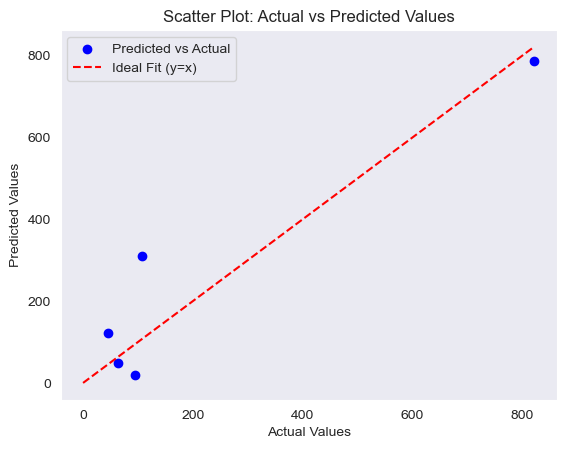

Log MAPE: 18.11%
Log Accuracy: 81.89%


In [31]:



import matplotlib.pyplot as plt

actual = [821, 107, 46, 63, 95]
predicted = [ 1.894054 * 415,0.748525 * 415, 0.295815* 415, 0.116905* 415, 0.046201 *415]

percentage_error = [(abs(a - p) / a) * 100 for a, p in zip(actual, predicted)]

mape = sum(percentage_error) / len(percentage_error)

accuracy = 100 - mape

# Print results
print("Percentage Errors:", percentage_error)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Model Accuracy: {accuracy:.2f}%")

plt.scatter(actual, predicted, color='blue', label='Predicted vs Actual')
plt.plot([0, max(actual)], [0, max(actual)], 'r--', label='Ideal Fit (y=x)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Actual vs Predicted Values')
plt.legend()
plt.grid()
plt.show()

import numpy as np

log_actual = np.log(actual)
log_predicted = np.log(predicted)
log_percentage_error = [(abs(a - p) / abs(a)) * 100 for a, p in zip(log_actual, log_predicted)]
log_mape = sum(log_percentage_error) / len(log_percentage_error)
log_accuracy = 100 - log_mape
print(f"Log MAPE: {log_mape:.2f}%")
print(f"Log Accuracy: {log_accuracy:.2f}%")


In [35]:
import numpy as np

observed = np.array([821/415, 107/415, 46/415, 63/415, 95/415])
predicted = np.array([ 1.894054 ,0.748525 , 0.295815, 0.116905, 0.046201 ])# Predicted values

n = len(observed)

y_mean = np.mean(observed)

SSE = np.sum((observed - predicted) ** 2)

SST = np.sum((observed - y_mean) ** 2)

SSR = SST - SSE
R_squared = 1 - (SSE / SST)

p = 2 
SE = np.sqrt(SSE / (n - p))

print(f"SSE: {SSE}")
print(f"SST: {SST}")
print(f"SSR: {SSR}")
print(f"R-squared: {R_squared}")
print(f"Standard Error (SE): {SE}")


SSE: 0.3166972202506442
SST: 2.579853099143562
SSR: 2.263155878892918
R-squared: 0.8772421498124142
Standard Error (SE): 0.32490881810678524


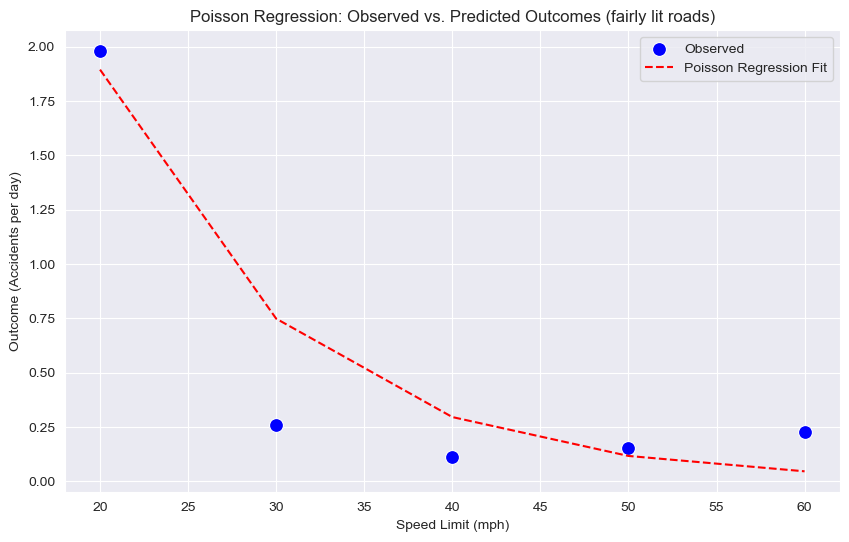

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'speed_limit': [20, 30, 40, 50, 60], 
    'outcome': [821/415, 107/415, 46/415, 63/415, 95/415] 
}
df = pd.DataFrame(data)

predicted_outcomes = [ 1.894054 ,0.748525 , 0.295815, 0.116905, 0.046201 ]  

df['predicted_outcome'] = predicted_outcomes
plt.figure(figsize=(10, 6))

sns.scatterplot(x='speed_limit', y='outcome', data=df, label='Observed', color='blue', s=100)

plt.plot(df['speed_limit'], df['predicted_outcome'], color='red', linestyle='--', label='Poisson Regression Fit')

plt.title("Poisson Regression: Observed vs. Predicted Outcomes (fairly lit roads)")
plt.xlabel("Speed Limit (mph)")
plt.ylabel("Outcome (Accidents per day)")
plt.legend()
plt.grid(True)
plt.show()


In [39]:
import pandas as pd
import statsmodels.formula.api as smf


data = {
    'outcome': [ 63564/1665, 6225/1665, 2036/1665, 2136/1665, 3254/1665], #, 51/1665, 3891/1665, 427/1665, 147/1665, 394/1665, 305/1665, 32/1665, 1119/1665, 149/1665, 57/1665, 148/1665, 174/1665] ,
    #'Light': [2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,],  # Categorical variable
    'Speed_limit': [ 30, 40, 50, 60, 70] 
   
}


df = pd.DataFrame(data)


formula = 'outcome ~ Speed_limit '
model = smf.poisson(formula=formula, data=df)
results = model.fit()
print(results.summary())
df = pd.DataFrame(data)
predicted_counts = results.predict(df)
df['predicted_outcome'] = predicted_counts
print("\nPredicted Outcomes:")
print(df[['outcome', 'predicted_outcome']])
test_data = {
     'Speed_limit': [ 30, 40, 50, 60, 70],
     #'time_in_days':[415,415,415,415,415]
     
}
test_df = pd.DataFrame(test_data)
test_predicted_counts = results.predict(test_df)
test_df['predicted_outcome'] = test_predicted_counts
print("\nPredicted Outcomes for Test Data:")
print(test_df[[ 'Speed_limit', 'predicted_outcome']])

print(test_df[[ 'predicted_outcome']])




Optimization terminated successfully.
         Current function value: 2.726174
         Iterations 8
                          Poisson Regression Results                          
Dep. Variable:                outcome   No. Observations:                    5
Model:                        Poisson   Df Residuals:                        3
Method:                           MLE   Df Model:                            1
Date:                Fri, 13 Dec 2024   Pseudo R-squ.:                  0.7295
Time:                        18:45:49   Log-Likelihood:                -13.631
converged:                       True   LL-Null:                       -50.393
Covariance Type:            nonrobust   LLR p-value:                 9.945e-18
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.2975      0.715     10.200      0.000       5.895       8.700
Speed_limit    -0.1264    

In [40]:
import numpy as np

observed = np.array([14842/415, 1446/415, 549/415, 536/415, 840/415])
predicted = np.array([  33.329305,9.419202,2.661963,0.752298,0.212607 ])# Predicted values

n = len(observed)

y_mean = np.mean(observed)

SSE = np.sum((observed - predicted) ** 2)

SST = np.sum((observed - y_mean) ** 2)

SSR = SST - SSE
R_squared = 1 - (SSE / SST)

p = 2  
SE = np.sqrt(SSE / (n - p))

# Print results
print(f"SSE: {SSE}")
print(f"SST: {SST}")
print(f"SSR: {SSR}")
print(f"R-squared: {R_squared}")
print(f"Standard Error (SE): {SE}")


SSE: 46.51507053698319
SST: 913.499800841922
SSR: 866.9847303049388
R-squared: 0.9490803714526125
Standard Error (SE): 3.937641872025404


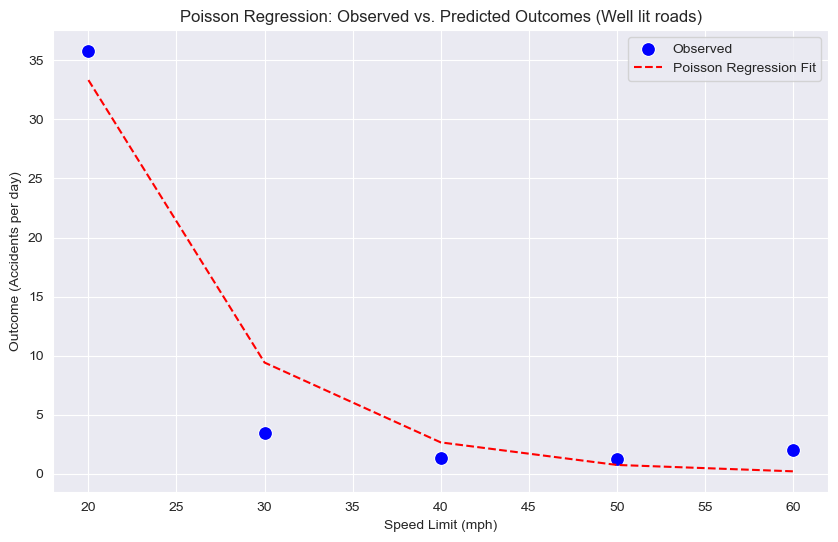

In [44]:
data = {
    'speed_limit': [20, 30, 40, 50, 60],  # Replace with your actual speed limit values
    'outcome': [14842/415, 1446/415, 549/415, 536/415, 840/415]  # Replace with your actual observed outcomes
}


df = pd.DataFrame(data)

predicted_outcomes = [  33.329305,9.419202,2.661963,0.752298,0.212607 ]  # Replace with your actual predicted values

df['predicted_outcome'] = predicted_outcomes

plt.figure(figsize=(10, 6))
sns.scatterplot(x='speed_limit', y='outcome', data=df, label='Observed', color='blue', s=100)

plt.plot(df['speed_limit'], df['predicted_outcome'], color='red', linestyle='--', label='Poisson Regression Fit')

plt.title("Poisson Regression: Observed vs. Predicted Outcomes (Well lit roads)")
plt.xlabel("Speed Limit (mph)")
plt.ylabel("Outcome (Accidents per day)")
plt.legend()

plt.grid(True)
plt.show()

In [42]:
data = {
    'outcome': [ 1119/1665, 149/1665, 57/1665, 148/1665, 174/1665], #, 51/1665, 3891/1665, 427/1665, 147/1665, 394/1665, 305/1665, 32/1665, 1119/1665, 149/1665, 57/1665, 148/1665, 174/1665] ,
    #'Light': [2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,],  # Categorical variable
    'Speed_limit': [ 30, 40, 50, 60, 70] 
   
}


df = pd.DataFrame(data)


formula = 'outcome ~ Speed_limit '
model = smf.poisson(formula=formula, data=df)
results = model.fit()
print(results.summary())
df = pd.DataFrame(data)
predicted_counts = results.predict(df)
df['predicted_outcome'] = predicted_counts
print("\nPredicted Outcomes:")
print(df[['outcome', 'predicted_outcome']])
test_data = {
     'Speed_limit': [ 30, 40, 50, 60, 70],
     #'time_in_days':[415,415,415,415,415]
     
}
test_df = pd.DataFrame(test_data)
test_predicted_counts = results.predict(test_df)
test_df['predicted_outcome'] = test_predicted_counts
print("\nPredicted Outcomes for Test Data:")
print(test_df[[ 'Speed_limit', 'predicted_outcome']])

print(test_df[[ 'predicted_outcome']])

Optimization terminated successfully.
         Current function value: 0.395176
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:                outcome   No. Observations:                    5
Model:                        Poisson   Df Residuals:                        3
Method:                           MLE   Df Model:                            1
Date:                Fri, 13 Dec 2024   Pseudo R-squ.:                  0.1519
Time:                        18:52:15   Log-Likelihood:                -1.9759
converged:                       True   LL-Null:                       -2.3297
Covariance Type:            nonrobust   LLR p-value:                    0.4002
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.3642      3.697      0.369      0.712      -5.882       8.610
Speed_limit    -0.0682    

In [45]:

observed = np.array([376/415, 58/415, 29/415, 63/415, 68/415])
predicted = np.array([ 0.505751,0.255716,0.129295,0.065374,0.033054 ])# Predicted values

n = len(observed)

y_mean = np.mean(observed)

SSE = np.sum((observed - predicted) ** 2)

SST = np.sum((observed - y_mean) ** 2)

SSR = SST - SSE

R_squared = 1 - (SSE / SST)

p = 2  
SE = np.sqrt(SSE / (n - p))

print(f"SSE: {SSE}")
print(f"SST: {SST}")
print(f"SSR: {SSR}")
print(f"R-squared: {R_squared}")
print(f"Standard Error (SE): {SE}")


SSE: 0.20177448362540082
SST: 0.48545100885469583
SSR: 0.283676525229295
R-squared: 0.5843566499090426
Standard Error (SE): 0.2593417845401449


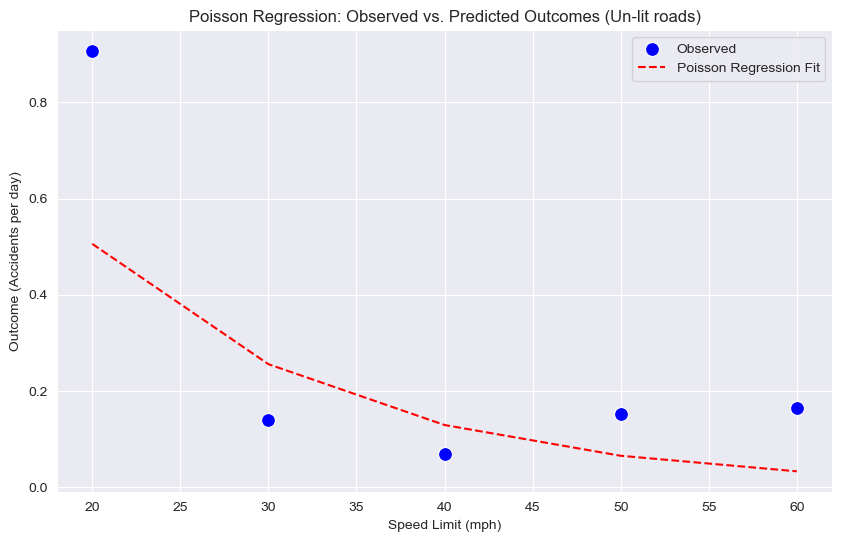

In [48]:
data = {
    'speed_limit': [20, 30, 40, 50, 60],  # Replace with your actual speed limit values
    'outcome': [376/415, 58/415, 29/415, 63/415, 68/415]  # Replace with your actual observed outcomes
}

df = pd.DataFrame(data)

predicted_outcomes = [ 0.505751,0.255716,0.129295,0.065374,0.033054 ]  

df['predicted_outcome'] = predicted_outcomes
plt.figure(figsize=(10, 6))

sns.scatterplot(x='speed_limit', y='outcome', data=df, label='Observed', color='blue', s=100)

plt.plot(df['speed_limit'], df['predicted_outcome'], color='red', linestyle='--', label='Poisson Regression Fit')

plt.title("Poisson Regression: Observed vs. Predicted Outcomes (Un-lit roads)")
plt.xlabel("Speed Limit (mph)")
plt.ylabel("Outcome (Accidents per day)")
plt.legend()
plt.grid(True)
plt.show()
